### Another simple data using linear regression and using statsmodel to:   
- generate the summary results  
- gather the relevant outputs  
    - coefficients  
    - r-squared  
    - standard error  
    - residuals  
- plot the curves  
    - data  
    - fit over the data  
    - residuals  

In addition to statsmodel, seaborn is used to compare the plots when using its library.  These exercises are useful for exploratory data analysis to discover behavior of the data.

In [2]:
# with so many data files, the file name identifies the name, type of data, & uses.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

file='test_data_univariate_linear_regression.csv'
df = pd.read_csv(file, sep='\t', header=None)

In [3]:
# clean up mainly on the column name, the data is a straight 2-column format and nothing else.
df.rename(columns={0:'height', 1:'pressure'}, inplace=True)
df

,height,pressure
0,0,-113.858
1,10,-111.484
2,20,-116.284
3,30,-111.936
4,40,-107.458
5,50,-102.115


In [4]:
df.columns

Index(['height', 'pressure'], dtype='object')

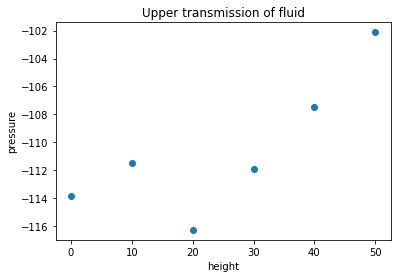

In [5]:
# First visualization, look at what the data is telling.  Note the semicolon to remove the plot notes.
plt.scatter(df['height'], df['pressure'])
plt.xlabel('height')
plt.ylabel('pressure')
plt.title('Upper transmission of fluid');

In [6]:
# statsmodel computation
import statsmodels.api as sm 
X = df['height']
y = df['pressure']
X =  sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

OLS Regression Results                            
Dep. Variable:               pressure   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6.915
Date:                Fri, 10 Jul 2020   Prob (F-statistic):             0.0582
Time:                        14:55:37   Log-Likelihood:                -14.667
No. Observations:                   6   AIC:                             33.33
Df Residuals:                       4   BIC:                             32.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -115.8897      2.472    -46.883      0.000    -122.753    -109.027
h

In [7]:
# quick highlight of the main results
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('Standard errors: ', results.bse)
print('Predictive values: ', results.predict())

Parameters:  const    -115.889714
height      0.214689
dtype: float64
R2:  0.6335178407879205
Standard errors:  const     2.471904
height    0.081644
dtype: float64
Predictive values:  [-115.88971429 -113.74282857 -111.59594286 -109.44905714 -107.30217143
 -105.15528571]


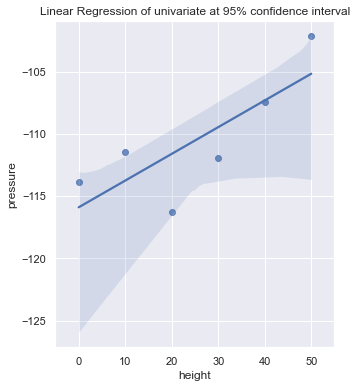

In [8]:
# Using seaborn to compare the visualization tools between it and statsmodel/matplotlib. 
sns.set(style='whitegrid')
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(5,6))
plt.xlim(-5, 55)
ax.set(xlabel='height', ylabel='pressure', title='Linear Regression of univariate at 95% confidence interval')
sns.regplot(x='height', y='pressure', data=df, ax=ax);

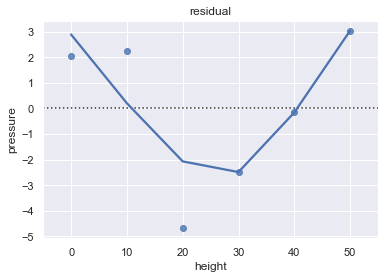

In [9]:
plt.xlim(-5, 55)
rx = sns.residplot(df['height'], df['pressure'], lowess=True, color='b', label='Residuals')
rx.set(title='residual');

In [10]:
# produce a hardcopy of the results summary
f = open('testdata_stderr.csv','w')
f.write(results.summary().as_csv())
f.close()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [11]:
# Attempt to plot thefit and residuals in matplotlib. 
# The statsmodels summary table produces a list of predicted values and these are incorporated into the data frame for plotting. 
df['predicted values'] = results.predict()
df

,height,pressure,predicted values
0,0,-113.858,-115.889714
1,10,-111.484,-113.742829
2,20,-116.284,-111.595943
3,30,-111.936,-109.449057
4,40,-107.458,-107.302171
5,50,-102.115,-105.155286


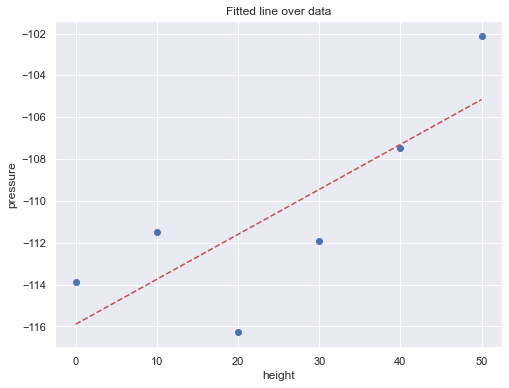

In [12]:
# code from https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
figp, axp = plt.subplots(figsize=(8,6))
plt.xlabel('height')
plt.ylabel('pressure')
plt.title('Fitted line over data')
axp.plot(df['height'], df['pressure'], 'o', label='data')
axp.plot(df['height'], df['predicted values'], 'r--', label='OLS');

In [13]:
# The residual plot. 
df['residuals'] = df['pressure'] - df['predicted values']
df

,height,pressure,predicted values,residuals
0,0,-113.858,-115.889714,2.031714
1,10,-111.484,-113.742829,2.258829
2,20,-116.284,-111.595943,-4.688057
3,30,-111.936,-109.449057,-2.486943
4,40,-107.458,-107.302171,-0.155829
5,50,-102.115,-105.155286,3.040286


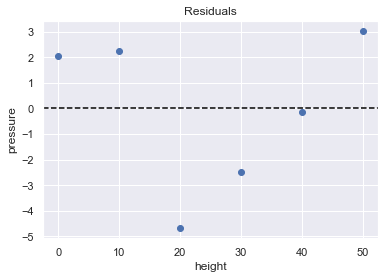

In [14]:
plt.plot(df['height'], df['residuals'], 'o')
plt.axhline(y=0.0, color='black', linestyle='--')
plt.xlabel('height')
plt.ylabel('pressure')
plt.title('Residuals');